In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13

#### Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html).

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/main/docs/homework_instructions.md).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

1. The target variable is "default.payment.next.month," which indicates whether a client will default or not so this is a binary classification problem.
It contains useful features like Repayment amount, Credit Limit, Bill amount, Payment amount and Age which would be helpful in determining the default status. It also contains categorical features like Sex, Education and Marriage which will need to be encoded. Overall this dataset has a informative features that can help predict credit card defaults.

In [3]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
train_df, test_df = train_test_split(credit_df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

In [5]:
train_df['EDUCATION'].value_counts()

2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: EDUCATION, dtype: int64

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Type your answer here, replacing this text._

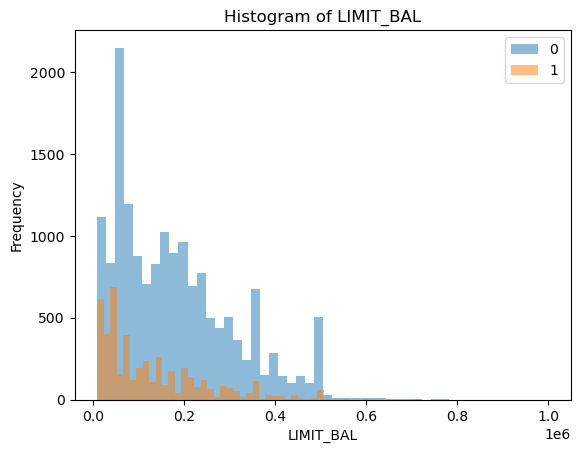

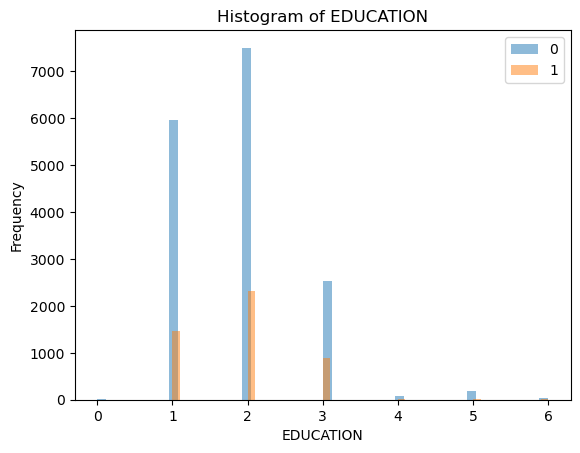

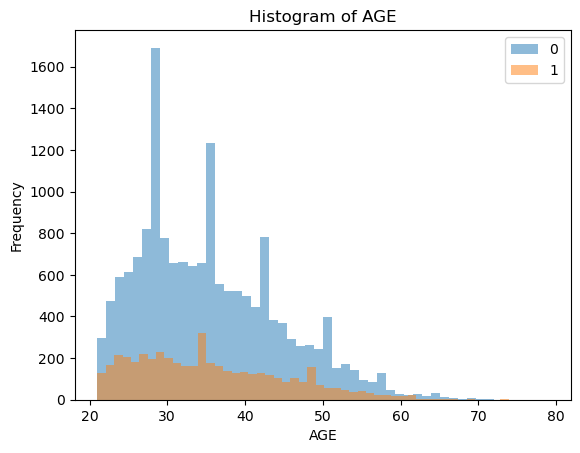

In [6]:
feat = ["LIMIT_BAL","EDUCATION", "AGE"]
for f in feat:
    ax = train_df.groupby("default.payment.next.month")[f].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(f)
    plt.title("Histogram of " + f)
    plt.show()

In [7]:
credit_summary = train_df.describe()
average_age = credit_summary.loc['mean', 'AGE']
average_education = train_df['EDUCATION'].value_counts().idxmax()
average_bill_amount_april2005 = credit_summary.loc['mean', 'BILL_AMT6']
print("Average age of a creditor:", average_age)
print("Average education level of a creditor:", average_education)
print("Average bill amount in April 2005", average_bill_amount_april2005, "NT dollar")

Average age of a creditor: 35.50080952380952
Average education level of a creditor: 2
Average bill amount in April 2005 38767.202666666664 NT dollar


In [8]:
...

Ellipsis

In [9]:
...

Ellipsis

In [10]:
...

Ellipsis

In [11]:
...

Ellipsis

In [12]:
...

Ellipsis

In [13]:
...

Ellipsis

In [14]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [15]:
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]

X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]

numeric_features = ['LIMIT_BAL','AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_features = ['EDUCATION']
drop_features = ['ID', 'SEX', 'MARRIAGE']
target = 'default.payment.next.month'

In [16]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [17]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features)
)
transformed_data = preprocessor.fit_transform(X_train)
transformed_df = pd.DataFrame(transformed_data)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [18]:
results_dict = {}
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [19]:
dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.009 (+/- 0.002),0.003 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000)


<!-- END QUESTION -->



In [20]:
cross_val_score(dummy, X_train, y_train)

array([0.77690476, 0.77690476, 0.77666667, 0.77666667, 0.77666667])

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Type your answer here, replacing this text._

In [21]:
pipe = make_pipeline(preprocessor, Ridge())
scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
print(pd.DataFrame(scores).mean().rename('mean').to_frame().T)
pd.DataFrame(scores)

      fit_time  score_time  test_score  train_score
mean  0.010701    0.002985    0.122075     0.125006


,fit_time,score_time,test_score,train_score
0,0.013659,0.003397,0.105571,0.128987
1,0.011279,0.002783,0.119527,0.125640
2,0.009660,0.002766,0.130217,0.122810
3,0.009523,0.003317,0.134072,0.122147
4,0.009384,0.002662,0.120987,0.125446


In [22]:
scores_dict = {
    "alpha": 10.0 ** np.arange(-2, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
   
}
for alpha in scores_dict["alpha"]:
    pipe_ridge = make_pipeline(preprocessor, Ridge(alpha=alpha))
    scores = cross_validate(pipe_ridge, X_train, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores_dict)
results_df

,alpha,mean_train_scores,mean_cv_scores
0,0.01,0.125006,0.122069
1,0.10,0.125006,0.122069
2,1.00,0.125006,0.122075
3,10.00,0.124993,0.122101
4,100.00,0.124854,0.122109
5,1000.00,0.123789,0.121478
6,10000.00,0.113909,0.112570
7,100000.00,0.065832,0.065449


<AxesSubplot: xlabel='alpha'>

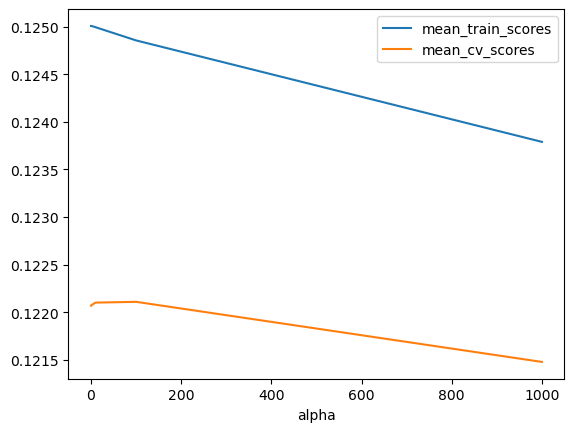

In [23]:
results_df.head(6).set_index('alpha').plot()

In [24]:
scores_dict = {
    "alpha": 10.0 ** np.arange(-2, 6, 1),
    "std_dev_train_scores": list(),
    "std_dev_cv_scores": list()
}
for alpha in scores_dict["alpha"]:
    pipe_ridge = make_pipeline(preprocessor, Ridge(alpha=alpha))
    scores = cross_validate(pipe_ridge, X_train, y_train, return_train_score=True)
    scores_dict["std_dev_train_scores"].append(scores["train_score"].std())
    scores_dict["std_dev_cv_scores"].append(scores["test_score"].std())

results_df = pd.DataFrame(scores_dict)
results_df

,alpha,std_dev_train_scores,std_dev_cv_scores
0,0.01,0.002427,0.009902
1,0.10,0.002427,0.009902
2,1.00,0.002427,0.009902
3,10.00,0.002428,0.009890
4,100.00,0.002428,0.009772
5,1000.00,0.002394,0.009096
6,10000.00,0.002097,0.006735
7,100000.00,0.001223,0.003197


<AxesSubplot: xlabel='alpha'>

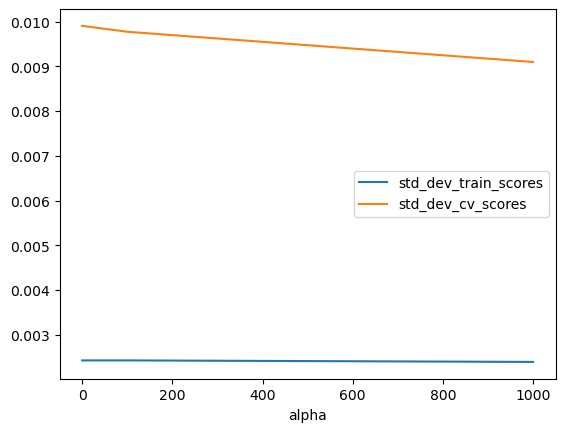

In [25]:
results_df.head(6).set_index('alpha').plot()

Generally, both the mean train scores and mean CV scores remain relatively stable across different alpha values, suggesting that the performance of the Ridge regression model is not highly sensitive to the choice of alpha in this particular case, until it reaches an alpha of 100,000, in which case it changes by a bit but relative to each other not much.
For the standard deviation, the scores are relatively small, so there isn't much variation in the alphas that range from 0.01 to a 1000, indicating that for the model's performance across different folds it is consistent, and also when tested on unseen data there is low variability in that alpha range. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Type your answer here, replacing this text._

In [26]:
from sklearn.svm import SVC

svm = SVC(random_state=123)


pipe = make_pipeline(preprocessor, svm)


results_dict["support_vector_machine"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict)
print(results_df)

                         dummy support_vector_machine
fit_time     0.009 (+/- 0.002)      7.820 (+/- 0.051)
score_time   0.003 (+/- 0.001)      2.871 (+/- 0.029)
test_score   0.777 (+/- 0.000)      0.819 (+/- 0.004)
train_score  0.777 (+/- 0.000)      0.824 (+/- 0.002)


In [27]:
from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(random_state=123)


pipe = make_pipeline(preprocessor, gb)


results_dict["gradient_boosting"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
print(results_df)

                                 fit_time         score_time  \
dummy                   0.009 (+/- 0.002)  0.003 (+/- 0.001)   
support_vector_machine  7.820 (+/- 0.051)  2.871 (+/- 0.029)   
gradient_boosting       4.454 (+/- 0.031)  0.007 (+/- 0.001)   

                               test_score        train_score  
dummy                   0.777 (+/- 0.000)  0.777 (+/- 0.000)  
support_vector_machine  0.819 (+/- 0.004)  0.824 (+/- 0.002)  
gradient_boosting       0.819 (+/- 0.005)  0.828 (+/- 0.001)  


In [28]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=123)

pipe = make_pipeline(preprocessor, rf)


results_dict["random_forest"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
print(results_df)

                                 fit_time         score_time  \
dummy                   0.009 (+/- 0.002)  0.003 (+/- 0.001)   
support_vector_machine  7.820 (+/- 0.051)  2.871 (+/- 0.029)   
gradient_boosting       4.454 (+/- 0.031)  0.007 (+/- 0.001)   
random_forest           3.388 (+/- 0.033)  0.063 (+/- 0.000)   

                               test_score        train_score  
dummy                   0.777 (+/- 0.000)  0.777 (+/- 0.000)  
support_vector_machine  0.819 (+/- 0.004)  0.824 (+/- 0.002)  
gradient_boosting       0.819 (+/- 0.005)  0.828 (+/- 0.001)  
random_forest           0.813 (+/- 0.006)  0.999 (+/- 0.000)  


For the SVM, the test score (0.819) is slightly lower than the train score (0.824), which suggests that there may be a small degree of overfitting.The small standard deviation (0.004) for the test score suggests that the model's performance is stable and consistent across different cross-validation folds. This indicates that the model is not excessively overfitting or underfitting the data. It is the same for the gradient_boosting model.

The test score (0.813) is noticeably lower than the train score (0.999), indicating a potential case of overfitting. The model may have memorized the training data to a high degree, leading to poor performance on unseen data. The standard deviation is small, however this does not mitigate the fact that there is a potential case of overfitting.


In summary, the SVM model has the longest fit time and relatively longer score time. On the other hand, both Gradient Boosting and Random Forest models have shorter fit times and significantly shorter score times. If faster prediction times are a priority, Gradient Boosting and Random Forest models would be preferable over the SVM model.

In all cases fit, score, test, train time, the linear model beats the other 3. 




<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

In [29]:
...

Ellipsis

In [30]:
...

Ellipsis

In [31]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

In terms of the best scores achieved, both the Gradient Boosting and Random Forest models performed similarly with scores of around 0.82 but we would say the best model is the Random Forest model. The Support Vector Machine model achieved a lower score of 0.777. We also had to reduce the number of fits and evaluations as it was taking way too long to run on our computers.

In [32]:
param_grid = {
    'C': [0.001, 1, 10],
    'gamma': [0.001, 1, 10]
}

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'C': 0.001, 'gamma': 0.001}
Best Score: 0.7767619047619047


In [33]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

gb_model = GradientBoostingClassifier()
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: {'learning_rate': 0.1018166251231487, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 107}
Best Score: 0.8199047619047619


In [34]:
from skopt import BayesSearchCV

param_dist = {
    'n_estimators': (50, 200),
    'max_depth': (3, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
    'max_features': (0.1, 0.9, 'uniform')
}

bayes_search = BayesSearchCV(rf, param_dist, cv=3, n_iter=10, n_jobs=-1)
bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: OrderedDict([('max_depth', 4), ('max_features', 0.47021113825667393), ('min_samples_leaf', 4), ('min_samples_split', 3), ('n_estimators', 114)])
Best Score: 0.820047619047619


In [35]:
...

Ellipsis

In [36]:
...

Ellipsis

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Type your answer here, replacing this text._

/Applications/anaconda3/envs/cpsc330/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Applications/anaconda3/envs/cpsc330/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_m

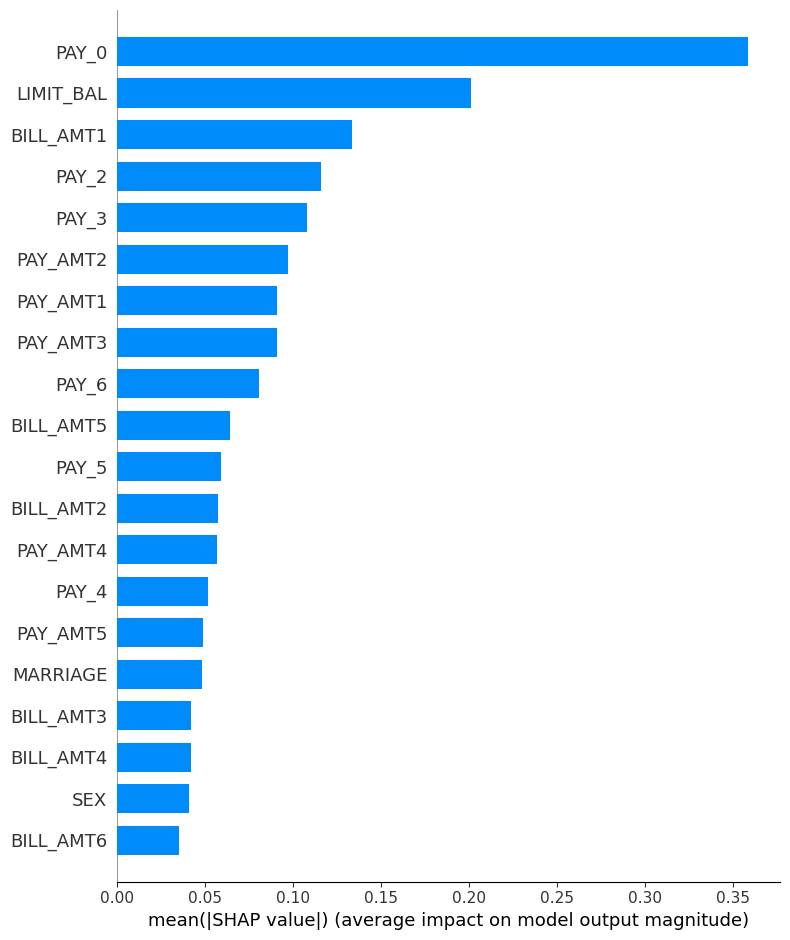

In [40]:
import shap

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4)
gb_model.fit(X_train, y_train)

explainer = shap.Explainer(gb_model, X_train)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)

plt.show()

Looking at the graph above we can see that the initial payment, the credit limit and the first bill amount are the most important features in determining the credit default. Confirming our earlier assumptions, ID, Sex and Marriage are not important. To our surprise bill amount 6 was not important at all. We can also observe that the the first few payments and bill amounts have more significance than the last few payments and bill amounts.  

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

best_model = bayes_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)


Test Accuracy: 0.8233333333333334
Test Precision: 0.6701520912547528
Test Recall: 0.36190965092402466
Test F1-score: 0.47000000000000003


The test scores are slightly higher than the validation scores obtained earlier. This could be due to random variations in the test data or the fact that the hyperparameter optimization process has fine-tuned the model's parameters, resulting in slightly better performance on the test set.
Regarding the extent of trust in the results, it is essential to consider the validation methodology, the quality of the data, and the robustness of the model. Cross-validation provides a good estimate of the model's performance, but the results should be interpreted cautiously, as they are based on a limited subset of the data.
Optimization bias refers to the potential bias introduced by hyperparameter optimization. It is possible to overfit the hyperparameters to the validation data, leading to overly optimistic results. In this case, by using cross-validation and evaluating the model's performance on both the validation and test sets, we have attempted to mitigate the risk of optimization bias.


In [51]:
prediction1 = y_pred[0]
prediction2 = y_pred[1]

print("Prediction 1:", prediction1)
print("Prediction 2:", prediction2)

Prediction 1: 0
Prediction 2: 0


In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

| Model                     | Best Hyperparameters                            | Best Score | Test Accuracy | Test Precision | Test Recall | Test F1-score |
|---------------------------|-------------------------------------------------|-------------|---------------|----------------|-------------|---------------|
| Support Vector Machine    | {'C': 0.001, 'gamma': 0.001}                    | 0.7768      | 0.8191        | 0.6692         | 0.3614      | 0.4693        |
| Gradient Boosting         | {'learning_rate': 0.03503400510345018, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 67}    | 0.82        | 0.8231        | 0.7345         | 0.3598      | 0.4816        |
| Random Forest             | {('max_depth': 3), ('max_features': 0.7941448298775192), ('min_samples_leaf': 4), ('min_samples_split': 6), ('n_estimators': 128)}     | 0.8205      | 0.8147        | 0.6882         | 0.3724      | 0.4811        |


2. These results provide an overview of the performance of each model and their respective hyperparameters. It appears that the Gradient Boosting model achieved the highest test accuracy and F1-score among the models considered.

3. We did not have time to do these but it could potentially improve the performance of the models.
- Explore additional feature engineering techniques to create new meaningful features from the existing ones.
- Implement feature selection methods to identify the most relevant features for the prediction task. 
- If the dataset has a class imbalance issue, where the number of defaulters is significantly smaller than non-defaulters, consider using techniques to address this imbalance. 



In [63]:
test_score = best_model.score(X_test, y_test)
test_score

0.8233333333333334

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)